In [2]:
# imoprts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import plotly.express as px

In [3]:
df = pd.read_csv(r"/Users/alaaabdalqader/Downloads/Airbnb_EDA-main/listings.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17475,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Luca,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,5,26,2023-12-04,0.16,1,32,9,NaN
1,18674,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,1,40,2023-11-07,0.31,30,39,7,HUTB-002062
2,198958,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Laura,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,2,105,2023-10-16,0.74,9,137,26,HUTB-000926
3,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,3,75,2023-11-25,0.48,2,300,11,HUTB005057
4,32711,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,1,99,2023-10-18,0.66,3,297,16,HUTB-001722


In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18321 entries, 0 to 18320
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18321 non-null  int64  
 1   name                            18321 non-null  object 
 2   host_id                         18321 non-null  int64  
 3   host_name                       18319 non-null  object 
 4   neighbourhood_group             18321 non-null  object 
 5   neighbourhood                   18321 non-null  object 
 6   latitude                        18321 non-null  float64
 7   longitude                       18321 non-null  float64
 8   room_type                       18321 non-null  object 
 9   price                           16056 non-null  float64
 10  minimum_nights                  18321 non-null  int64  
 11  number_of_reviews               18321 non-null  int64  
 12  last_review                     

In [7]:
df.shape

(18321, 18)

In [8]:
def review(describ):

  rating_match = re.search(r"(?<=★)(\d+\.\d{1,2})",describ)
  if rating_match:
    return float(rating_match.group())
  else:
    return None
      

In [9]:
df["rating"] = df["name"].apply(review)

In [10]:
df["rating"].isna().sum()/len(df)

0.3802194203373178

In [11]:
df["desc_text"]=df["name"].apply(lambda x : x.split("·")[0].strip())

In [12]:
df["bedrooms"] =df["name"].apply(lambda x:int(re.search("\d\ bedroom",x).group().split(" ")[0]) 
                                     if re.search("\d\ bedroom",x) 
                                     else 0 )

In [13]:
df["beds"] =df["name"].apply(lambda x:int(re.search("\d\ bed",x).group().split(" ")[0])
                                 if re.search("\d\ bed",x) 
                                 else 0 )

In [14]:
df["bath"] =df["name"].apply(lambda x:re.search(r"\d\ [a-z]* bath|\d\ bath|\ [a-z A-Z]*-bath",x).group().strip() 
                                 if re.search(r"\d\ [a-z A-Z]* bath|\d\ bath|\ [a-z A-Z]*-bath",x) 
                                 else 0 )

In [15]:
len(df["bath"].unique())

21

In [16]:
df.nunique()

id                                18321
name                               6256
host_id                            7016
host_name                          3366
neighbourhood_group                  10
neighbourhood                        71
latitude                           9338
longitude                         10149
room_type                             4
price                               567
minimum_nights                       86
number_of_reviews                   553
last_review                        1651
reviews_per_month                   791
calculated_host_listings_count       66
availability_365                    366
number_of_reviews_ltm               180
license                            5692
rating                              174
desc_text                            72
bedrooms                             10
beds                                 10
bath                                 21
dtype: int64

In [17]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             2265
minimum_nights                       0
number_of_reviews                    0
last_review                       4369
reviews_per_month                 4369
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5917
rating                            6966
desc_text                            0
bedrooms                             0
beds                                 0
bath                                 0
dtype: int64

In [18]:
df[df["price"].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,desc_text,bedrooms,beds,bath
15,223096,Loft in Barcelona · ★4.81 · 2 bedrooms · 2 bed...,874133,Barbara,Sants-Montjuïc,Sants,41.373640,2.139060,Entire home/apt,NaN,...,0.42,1,0,12,Exempt,4.81,Loft in Barcelona,2,2,2 bath
67,190348,Rental unit in Barcelona · 1 bedroom · 1 bed ·...,919480,Elisa,Les Corts,Pedralbes,41.388930,2.124430,Private room,NaN,...,0.01,1,0,0,NaN,NaN,Rental unit in Barcelona,1,1,1 bath
94,456333,Rental unit in Barcelona · ★4.90 · 1 bedroom ·...,2268672,Bruna,Eixample,el Fort Pienc,41.399370,2.175990,Private room,NaN,...,0.29,1,0,0,NaN,4.90,Rental unit in Barcelona,1,1,5 bath
101,323854,Rental unit in Barcelona · ★4.56 · 1 bedroom ·...,1657312,Alberto,Eixample,la Sagrada Família,41.408430,2.174940,Private room,NaN,...,0.15,1,0,0,NaN,4.56,Rental unit in Barcelona,1,1,1 bath
107,480975,Loft in Barcelona · 1 bedroom · 2 beds · 1 bath,2272146,Javi,Sants-Montjuïc,el Poble Sec,41.372270,2.165740,Private room,NaN,...,NaN,1,0,0,NaN,NaN,Loft in Barcelona,1,1,1 bath
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18079,1030403433879426917,Rental unit in Barcelona · ★New · 2 bedrooms ·...,489650915,MarionMarco,Eixample,l'Antiga Esquerra de l'Eixample,41.391658,2.149294,Entire home/apt,NaN,...,NaN,1,141,0,NaN,NaN,Rental unit in Barcelona,2,2,1 bath
18126,1033453503655180567,Condo in Barcelona · ★New · 1 bedroom · 1 bed ...,360930549,Pedro,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.384684,2.183083,Private room,NaN,...,NaN,1,17,0,NaN,NaN,Condo in Barcelona,1,1,2 bath
18192,1029737270786475335,Rental unit in Barcelona · ★New · 1 bedroom · ...,410448647,Maria,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408884,2.209796,Private room,NaN,...,NaN,1,85,0,NaN,NaN,Rental unit in Barcelona,1,1,1 bath
18198,1035592562238492407,Rental unit in Barcelona · ★New · 2 bedrooms ·...,39278621,Sebastian,Horta-Guinardó,Can Baró,41.417708,2.165506,Entire home/apt,NaN,...,NaN,1,333,0,NaN,NaN,Rental unit in Barcelona,2,2,1 bath


In [19]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             2265
minimum_nights                       0
number_of_reviews                    0
last_review                       4369
reviews_per_month                 4369
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5917
rating                            6966
desc_text                            0
bedrooms                             0
beds                                 0
bath                                 0
dtype: int64

In [20]:
df.nunique()

id                                18321
name                               6256
host_id                            7016
host_name                          3366
neighbourhood_group                  10
neighbourhood                        71
latitude                           9338
longitude                         10149
room_type                             4
price                               567
minimum_nights                       86
number_of_reviews                   553
last_review                        1651
reviews_per_month                   791
calculated_host_listings_count       66
availability_365                    366
number_of_reviews_ltm               180
license                            5692
rating                              174
desc_text                            72
bedrooms                             10
beds                                 10
bath                                 21
dtype: int64

<Axes: >

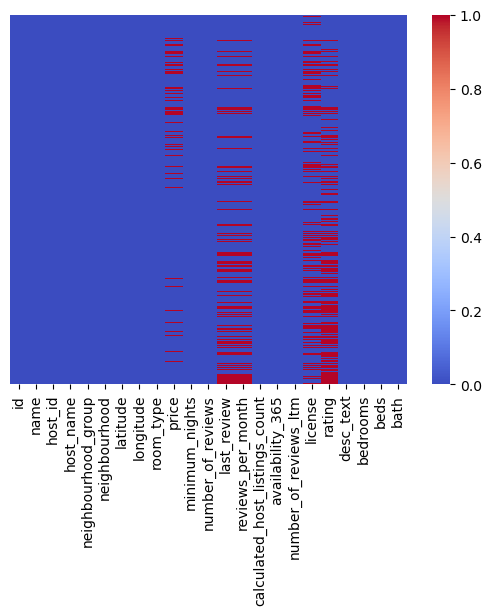

In [21]:
sns.heatmap(data=df.isnull(), yticklabels=False, cbar=True, cmap="coolwarm")

<Axes: xlabel='neighbourhood_group', ylabel='count'>

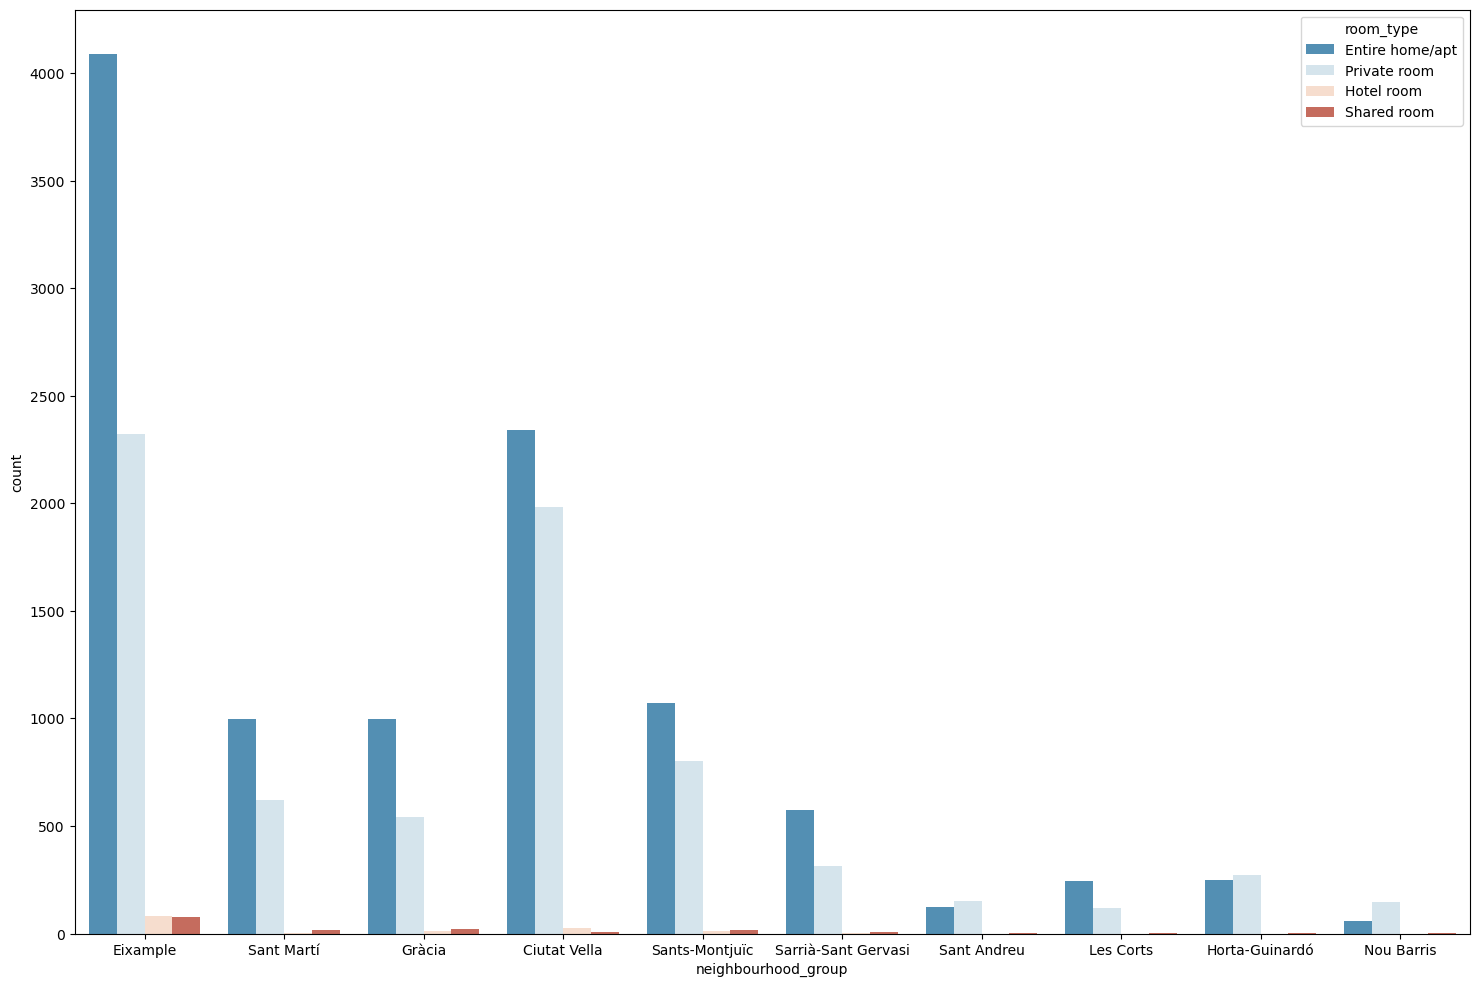

In [22]:
plt.figure(figsize=(18,12))
sns.countplot(x="neighbourhood_group",data=df,palette="RdBu_r",hue="room_type")

<Axes: xlabel='price'>

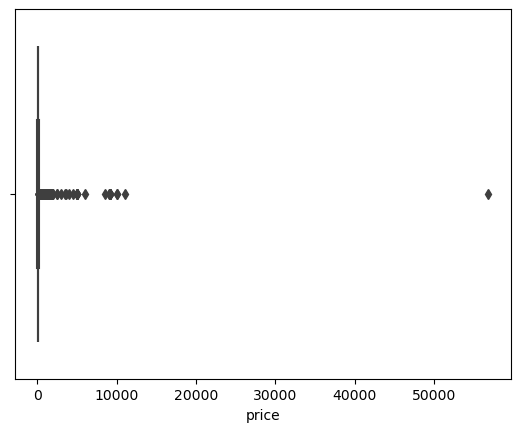

In [23]:
sns.boxplot(x="price",data=df)

In [24]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds
count,1.832100e+04,1.832100e+04,18321.000000,18321.000000,16056.000000,18321.000000,18321.000000,13952.000000,18321.000000,18321.000000,18321.000000,11355.000000,18321.000000,18321.000000
mean,3.370245e+17,1.723186e+08,41.391914,2.166945,126.494083,14.865892,43.864309,1.443145,33.812838,171.187381,11.819933,4.594294,1.717319,1.758692
std,4.184948e+17,1.766263e+08,0.014042,0.017454,548.481873,31.514680,89.887244,1.894793,66.230543,136.551292,23.855482,0.350702,1.134199,1.103492
min,1.747500e+04,3.073000e+03,41.352720,2.085593,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.239606e+07,1.023157e+07,41.381010,2.156690,50.000000,1.000000,1.000000,0.240000,1.000000,13.000000,0.000000,4.430000,1.000000,1.000000
50%,4.638623e+07,1.038178e+08,41.389521,2.168030,87.000000,3.000000,7.000000,0.830000,5.000000,176.000000,2.000000,4.670000,1.000000,1.000000
75%,8.064681e+17,3.289379e+08,41.401320,2.177490,130.000000,31.000000,44.000000,2.122500,29.000000,310.000000,15.000000,4.830000,2.000000,2.000000
max,1.045480e+18,5.496387e+08,41.459560,2.227710,56815.000000,1124.000000,1941.000000,67.300000,318.000000,365.000000,1065.000000,5.000000,9.000000,9.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18321 entries, 0 to 18320
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18321 non-null  int64  
 1   name                            18321 non-null  object 
 2   host_id                         18321 non-null  int64  
 3   host_name                       18319 non-null  object 
 4   neighbourhood_group             18321 non-null  object 
 5   neighbourhood                   18321 non-null  object 
 6   latitude                        18321 non-null  float64
 7   longitude                       18321 non-null  float64
 8   room_type                       18321 non-null  object 
 9   price                           16056 non-null  float64
 10  minimum_nights                  18321 non-null  int64  
 11  number_of_reviews               18321 non-null  int64  
 12  last_review                     

In [26]:
first_quartile, third_quartile = np.nanpercentile(df["price"], [25, 75])

In [27]:
iqr = third_quartile-first_quartile

In [28]:
lower_bound = first_quartile - (1.5*iqr)
upper_bound = third_quartile + (1.5*iqr)

In [29]:
upper_bound


250.0

In [30]:
lower_bound


-70.0

In [31]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,desc_text,bedrooms,beds,bath
0,17475,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Luca,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,...,0.16,1,32,9,NaN,4.40,Rental unit in 08013 Barcelona,1,1,1 bath
1,18674,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,...,0.31,30,39,7,HUTB-002062,4.33,Rental unit in Barcelona,3,3,2 bath
2,198958,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Laura,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,...,0.74,9,137,26,HUTB-000926,4.69,Rental unit in Barcelona,4,4,2 bath
3,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,...,0.48,2,300,11,HUTB005057,4.77,Rental unit in Sant Adria de Besos,3,3,2 bath
4,32711,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,...,0.66,3,297,16,HUTB-001722,4.48,Rental unit in Barcelona,2,2,5 bath


In [32]:
no_outliers = df.loc[(df["price"]<=upper_bound)&(df["price"]>=lower_bound)]

In [33]:
df["last_review"] = pd.to_datetime(df["last_review"])

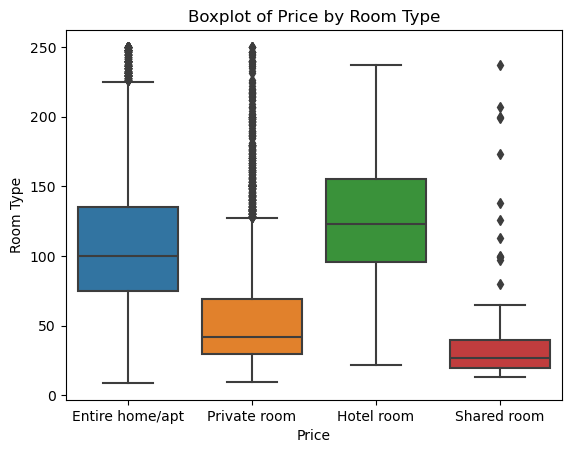

In [34]:
sns.boxplot(data=no_outliers,x="room_type",y="price")
plt.xlabel("Price")
plt.ylabel("Room Type")
plt.title("Boxplot of Price by Room Type")
plt.show()


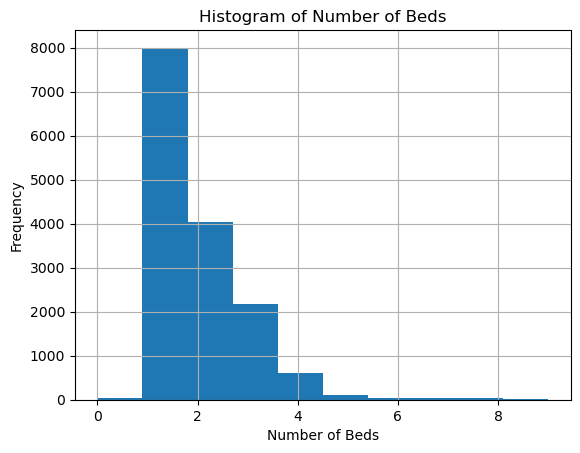

In [35]:
plt.hist(no_outliers["beds"])
plt.xlabel("Number of Beds")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Beds")
plt.grid()
plt.show()


<Axes: xlabel='bath', ylabel='price'>

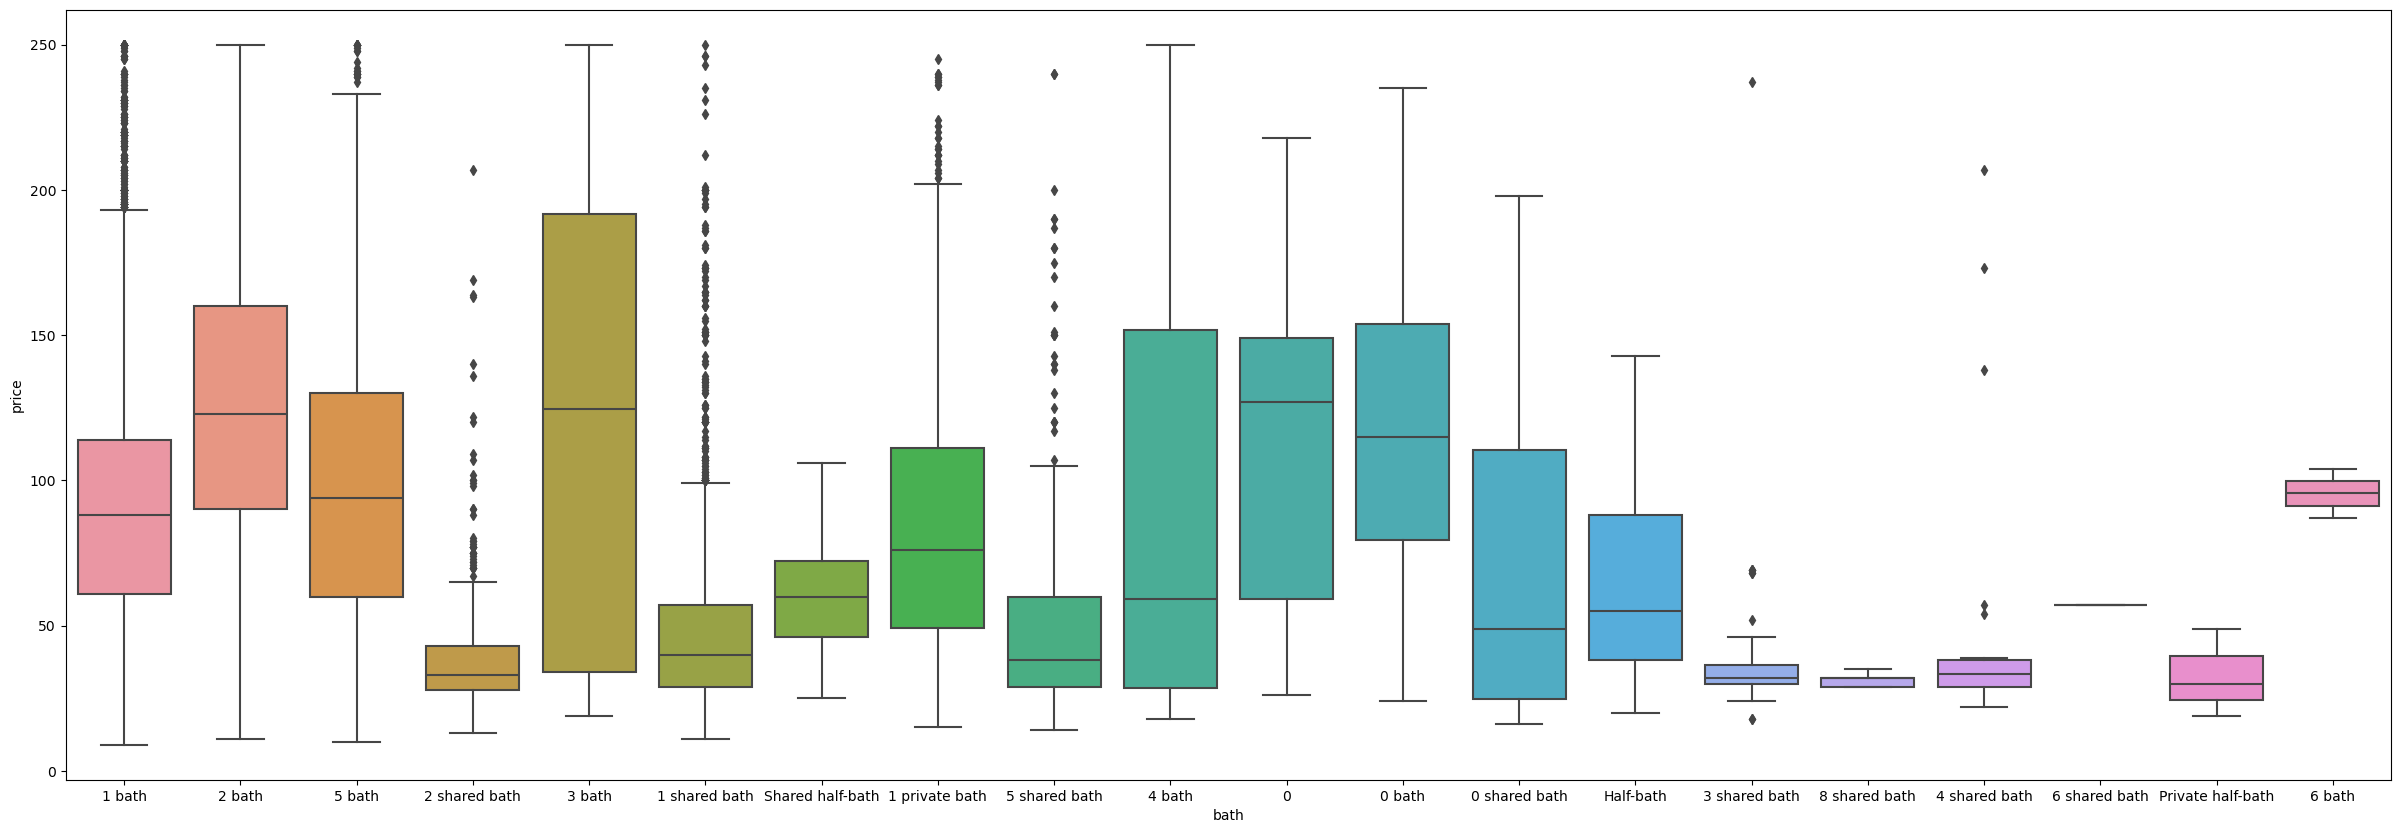

In [36]:
plt.figure(figsize=(30,10))
sns.boxplot(data=no_outliers,x="bath",y="price")

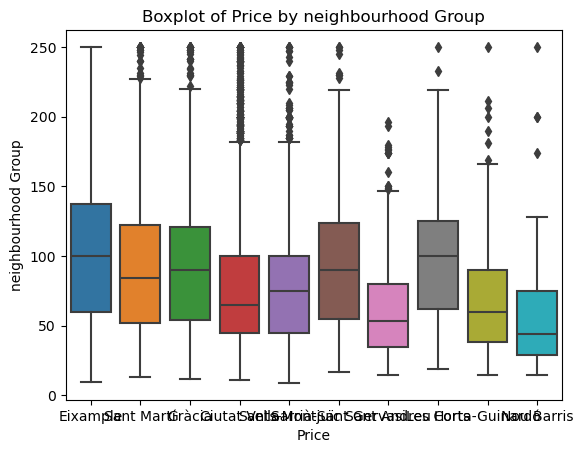

In [37]:
sns.boxplot(data=no_outliers,x="neighbourhood_group",y="price")
plt.xlabel("Price")
plt.ylabel("neighbourhood Group")
plt.title("Boxplot of Price by neighbourhood Group")
plt.show()

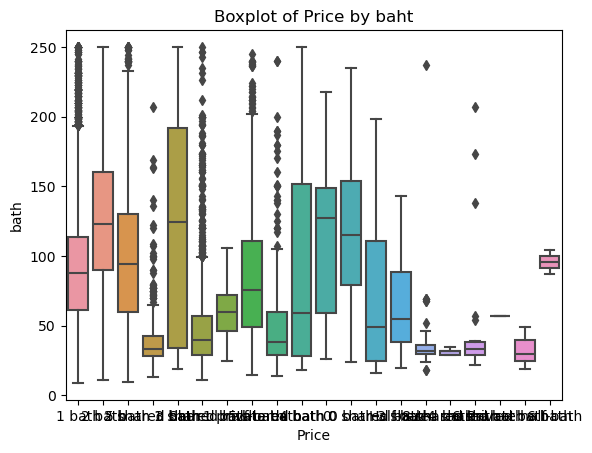

In [38]:
sns.boxplot(data=no_outliers,x="bath",y="price")
plt.xlabel("Price")
plt.ylabel("bath")
plt.title("Boxplot of Price by baht")
plt.show()

In [39]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,desc_text,bedrooms,beds,bath
0,17475,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Luca,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,...,0.16,1,32,9,NaN,4.40,Rental unit in 08013 Barcelona,1,1,1 bath
1,18674,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,...,0.31,30,39,7,HUTB-002062,4.33,Rental unit in Barcelona,3,3,2 bath
2,198958,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Laura,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,...,0.74,9,137,26,HUTB-000926,4.69,Rental unit in Barcelona,4,4,2 bath
3,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,...,0.48,2,300,11,HUTB005057,4.77,Rental unit in Sant Adria de Besos,3,3,2 bath
4,32711,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,...,0.66,3,297,16,HUTB-001722,4.48,Rental unit in Barcelona,2,2,5 bath


In [40]:
pivot_table = pd.pivot_table(index=["room_type", "neighbourhood_group", "beds", "bath"], 
                             values="price", 
                             data=no_outliers, 
                             aggfunc="median")


In [41]:
pivot_table

price
room_type       neighbourhood_group beds bath                
Entire home/apt Ciutat Vella        0    1 bath          58.5
                                         5 bath         150.0
                                    1    0 bath          81.0
                                         1 bath          65.0
                                         2 bath          79.0
...                                                       ...
Shared room     Sants-Montjuïc      1    0 shared bath  113.0
                                         1 shared bath   52.0
                                         2 shared bath   50.0
                                         5 shared bath   29.0
                Sarrià-Sant Gervasi 1    1 shared bath   20.0

[511 rows x 1 columns]

In [42]:
pivot_table_mean = pd.pivot_table(index=["room_type", "neighbourhood_group"], 
                                  values="price", 
                                  data=df, 
                                  aggfunc="median")


In [43]:
pivot_table_mean.iloc[0]

price    84.0
Name: (Entire home/apt, Ciutat Vella), dtype: float64

In [44]:
outliers = df.loc[(df["price"]>upper_bound)|(df["price"]<lower_bound)]

In [45]:
len(outliers)

974

In [46]:
len(no_outliers)

15082

In [47]:
def imput_price(col, pivot_table, pivot_table_mean):
    price = col.iloc[0]
    room_type = col.iloc[1]
    nig = col.iloc[2]
    beds = col.iloc[3]
    bath = col.iloc[4]

    if pd.isnull(price):
        try:
            return pivot_table.loc[(room_type, nig, beds, bath)][0]
        except KeyError:
            return pivot_table_mean.loc[(room_type, nig)][0]
    else:
        return price


In [48]:
df["neighbourhood_group"].unique()

array(['Eixample', 'Sant Martí', 'Gràcia', 'Ciutat Vella',
       'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Sant Andreu',
       'Les Corts', 'Horta-Guinardó', 'Nou Barris'], dtype=object)

In [56]:
df["price"] = df.apply(lambda row: imput_price(row[["price", "room_type", "neighbourhood_group", "beds", "bath"]], pivot_table, pivot_table_mean), axis=1)

In [57]:
#  remove the outliers from the dataset
no_outliers = df.loc[(df["price"]<=upper_bound)&(df["price"]>=lower_bound)]


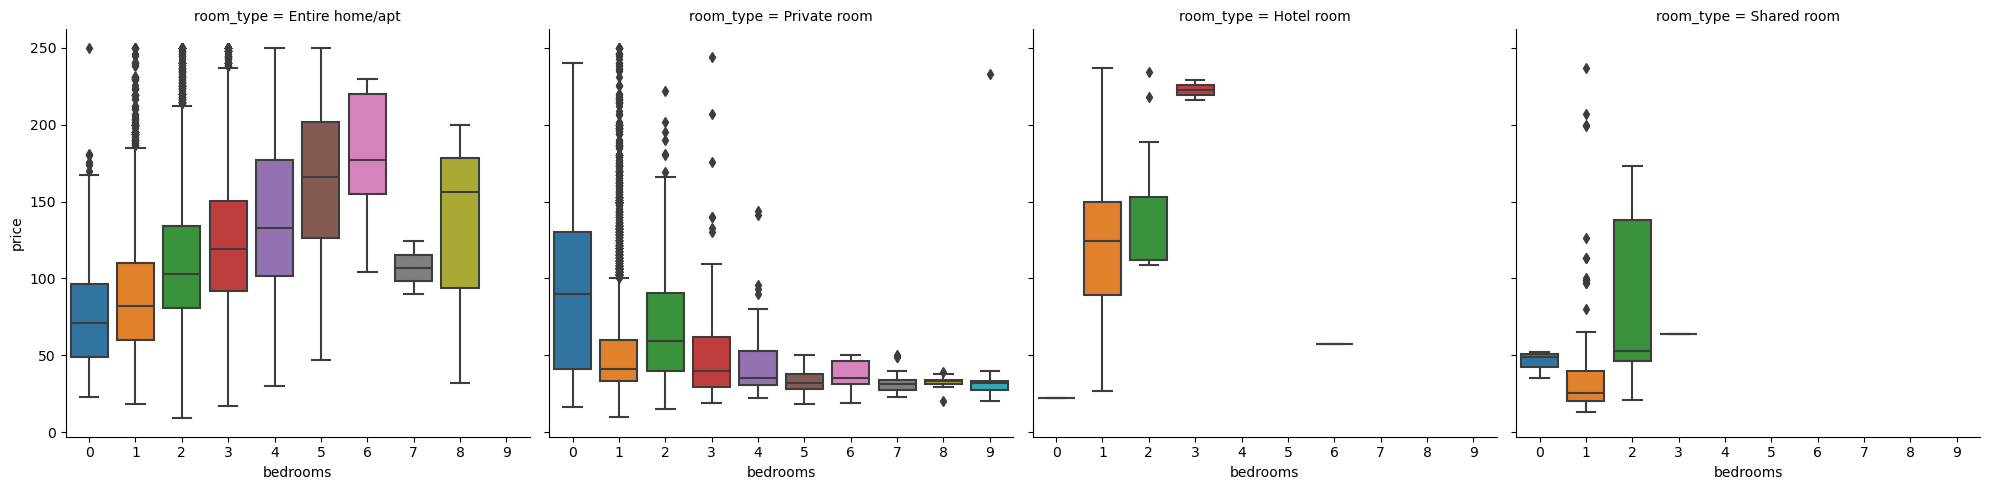

In [58]:
sns.catplot(x="bedrooms",y="price", col ="room_type",data=no_outliers,kind="box")

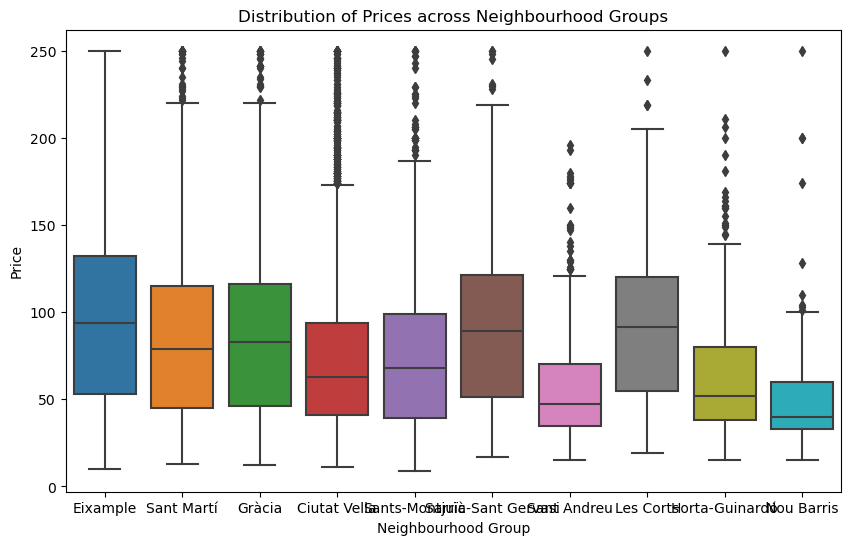

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=no_outliers, x="neighbourhood_group", y="price")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.title("Distribution of Prices across Neighbourhood Groups")
plt.show()


In [60]:
len(df["price"])-len(no_outliers["price"])

974

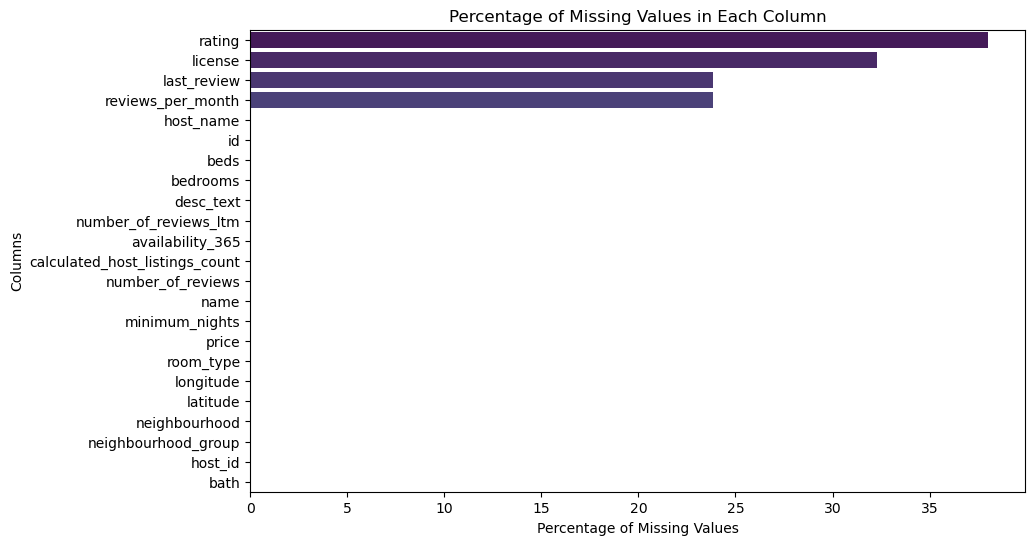

In [61]:
plt.figure(figsize=(10, 6))
missing_values_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
sns.barplot(x=missing_values_percentage.values, y=missing_values_percentage.index, palette="viridis")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Percentage of Missing Values in Each Column")
plt.show()


In [70]:
def imput_rating(col):
  rating = col[0]
  room_type = col[1]
  nig = col[2]
  price = col[3]
  if pd.isnull(rating):
    try:
      return pivot_rating.loc[(room_type,nig,price)][0]
    except:
      return pivot_rating2.loc[(room_type)][0]

  else:
    return rating

In [74]:
pivot_rating2 = pd.pivot_table(index=["room_type"],values="rating", data=no_outliers,aggfunc=np.mean)


/var/folders/3q/xgqmvw0s51n6tmcmn1lzbk300000gn/T/ipykernel_21484/3344362197.py:1: FutureWarning: The provided callable <function mean at 0x10553e200> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_rating2 = pd.pivot_table(index=["room_type"],values="rating", data=no_outliers,aggfunc=np.mean)


In [75]:
pivot_rating2

,rating
room_type,
Entire home/apt,4.574755
Hotel room,4.645056
Private room,4.619271
Shared room,4.508039


In [76]:
mask = ((no_outliers["number_of_reviews"]==0) & pd.isnull(no_outliers["rating"]))
len(no_outliers[mask])

4107

In [77]:
no_outliers["rating"].isna().sum()

6588

In [78]:
no_outliers["neighbourhood_group"].value_counts()

neighbourhood_group
Eixample               6092
Ciutat Vella           4185
Sants-Montjuïc         1829
Sant Martí             1538
Gràcia                 1500
Sarrià-Sant Gervasi     859
Horta-Guinardó          510
Les Corts               351
Sant Andreu             278
Nou Barris              205
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='neighbourhood_group'>

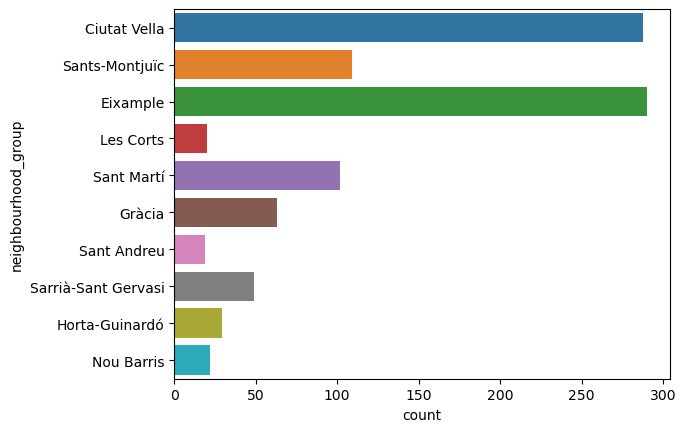

In [79]:
mask = ((no_outliers["rating"]==5.00))
sns.countplot(y="neighbourhood_group",data=no_outliers[mask])

<Axes: xlabel='count', ylabel='neighbourhood'>

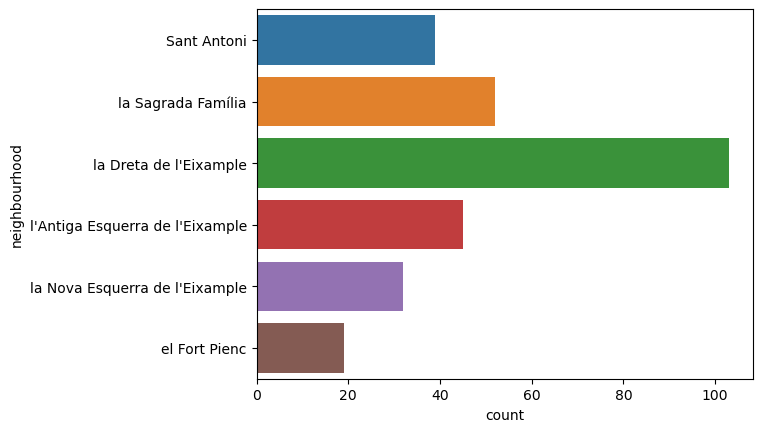

In [80]:
mask = ((no_outliers["neighbourhood_group"]=="Eixample")& (no_outliers["rating"]==5.00))
sns.countplot(y="neighbourhood",data=no_outliers[mask])


In [82]:
# In conclusion
### This project dives into exploring data from Airbnb listings in a specific city. We're aiming to dig into things like pricing, availability, where these places are, and what type of properties they are. The idea is to uncover the hidden trends and patterns that drive people's interest in Airbnb listings. By doing this analysis, we hope to give everyone a solid understanding of what the Airbnb scene looks like in the city, so they can make smarter choices